In [135]:
!pip3 install decorator==5.0.9

# !pip3 install --user decorator==4.3.0 # (ignore waring for availability of newer version)
# !pip3 install --user networkx==2.3

Defaulting to user installation because normal site-packages is not writeable


In [136]:

import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import math
import os
import scipy

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from sklearn.preprocessing import Normalizer
from pathlib import Path


seed = 0
np.random.seed(seed)

In [137]:
#Path to the target csv file. This notebook should be in the same folder as the csv-data file

path = os.getcwd()
print(path)


/Users/fmd/Desktop/USI/Semester_4/Data_Analytics/Autonomous-Systems


<br>

<font size="10"> **DATA ANALYSIS SECTION**</font>

<br>

In [138]:
#convert the data to a pandas dataframe. 
data = pd.read_csv(path+'/11_Autonomous_Systems.csv',index_col=0)
data

,Zeus,Hera,Poseidon,Demeter,Athena,Apollo,Artemis,Ares,Aphrodite,Hephaestus,...,Hestia,Dionysus,Granite,Mica,Shale,Quartz,Ruby,Atlas,Ryoken,Vulture
ComputerNumber,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
5,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [139]:
list_of_column_names = list(data.columns)
column_names = list_of_column_names[1:22]
column_names

['Hera',
 'Poseidon',
 'Demeter',
 'Athena',
 'Apollo',
 'Artemis',
 'Ares',
 'Aphrodite',
 'Hephaestus',
 'Hermes',
 'Hestia',
 'Dionysus',
 'Granite',
 ' Mica',
 ' Shale',
 ' Quartz',
 ' Ruby',
 ' Atlas',
 ' Ryoken',
 ' Vulture']

In [140]:
data.describe()

,Zeus,Hera,Poseidon,Demeter,Athena,Apollo,Artemis,Ares,Aphrodite,Hephaestus,...,Hestia,Dionysus,Granite,Mica,Shale,Quartz,Ruby,Atlas,Ryoken,Vulture
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.150327,0.052288,0.058824,0.065359,0.339869,0.111111,0.065359,0.300654,0.111111,0.130719,...,0.071895,0.071895,0.450980,0.078431,0.052288,0.104575,0.078431,0.052288,0.104575,0.111111
std,0.358565,0.223337,0.236067,0.247971,0.475220,0.315302,0.247971,0.460048,0.315302,0.338200,...,0.259163,0.259163,0.499225,0.269732,0.223337,0.307010,0.269732,0.223337,0.307010,0.315302
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [141]:
#total number of columns
data.shape[0]

153

In [142]:
#total number of rows
data.shape[1]

21

In [143]:
#Check that there aren't any missing values in the dataset
check=data.isnull().any().sum()
if check == 0:
    print('There are no missing values in the dataset')
else:
    print('There are missing values in the dataset')


There are no missing values in the dataset


In [144]:
#total number of computers in dataset
getNumIn = data.shape[0]

In [145]:
#Check that all values are binary
check = data.columns[data.isin([0,1]).all()]
if len(check) == data.shape[1]:
    print('All values in the columns are binary')

All values in the columns are binary


In [146]:
connectedToServer = data[data['Zeus'] == 1]
NotconnectedToServer = data[data['Zeus'] == 0]
print(f"Num of Zeus that has no connection to computer is {len(NotconnectedToServer)}")
print(f"Num of Zeus connection to computer is {len(connectedToServer)}")

print("\n")

connectedToServer = data[data['Hera'] == 1]
NotconnectedToServer = data[data['Hera'] == 0]
print(f"Num of Hera that has no connection to computer is {len(NotconnectedToServer)}")
print(f"Num of Hera connection to computer is {len(connectedToServer)}")

print("\n")

connectedToServer = data[data['Poseidon'] == 1]
NotconnectedToServer = data[data['Poseidon'] == 0]
print(f"Num of Poseidon that has no connection to computer is {len(NotconnectedToServer)}")
print(f"Num of Poseidon connection to computer is {len(connectedToServer)}")

print("\n")

connectedToServer = data[data['Demeter'] == 1]
NotconnectedToServer = data[data['Demeter'] == 0]
print(f"Num of Demeter that has no connection to computer is {len(NotconnectedToServer)}")
print(f"Num of Demeter connection to computer is {len(connectedToServer)}")

print("\n")

connectedToServer = data[data['Athena'] == 1]
NotconnectedToServer = data[data['Athena'] == 0]
print(f"Num of Athena that has no connection to computer is {len(NotconnectedToServer)}")
print(f"Num of Athena connection to computer is {len(connectedToServer)}")

print("\n")

connectedToServer = data[data['Apollo'] == 1]
NotconnectedToServer = data[data['Apollo'] == 0]
print(f"Num of Apollo that has no connection to computer is {len(NotconnectedToServer)}")
print(f"Num of Apollo connection to computer is {len(connectedToServer)}")

print("\n")

connectedToServer = data[data['Artemis'] == 1]
NotconnectedToServer = data[data['Artemis'] == 0]
print(f"Num of Artemis that has no connection to computer is {len(NotconnectedToServer)}")
print(f"Num of Artemis connection to computer is {len(connectedToServer)}")

Num of Zeus that has no connection to computer is 130
Num of Zeus connection to computer is 23


Num of Hera that has no connection to computer is 145
Num of Hera connection to computer is 8


Num of Poseidon that has no connection to computer is 144
Num of Poseidon connection to computer is 9


Num of Demeter that has no connection to computer is 143
Num of Demeter connection to computer is 10


Num of Athena that has no connection to computer is 101
Num of Athena connection to computer is 52


Num of Apollo that has no connection to computer is 136
Num of Apollo connection to computer is 17


Num of Artemis that has no connection to computer is 143
Num of Artemis connection to computer is 10


In [147]:
#to dusplay the connection for each computer
cc = 0
cn = 0
for index, row in data.iterrows():
    for column in row:
        if column == 1: #connected to the computer network
            cc = cc + 1 
            
        if column == 0: #not connected
            cn = cn + 1
    #NotconnectedToServer = [row == 0]
    #print(row)
cn #number of total servers that are not connected, in other words 0

2813

In [148]:
#sum of connection
sum = data.loc[0:153].sum().astype(int)
sum[1:]
#feed in as a node attribute

Hera           8
Poseidon       9
Demeter       10
Athena        52
Apollo        17
Artemis       10
Ares          46
Aphrodite     17
Hephaestus    20
Hermes         8
Hestia        11
Dionysus      11
Granite       69
 Mica         12
 Shale         8
 Quartz       16
 Ruby         12
 Atlas         8
 Ryoken       16
 Vulture      17
dtype: int64

In [149]:
#sum of connected for each computer
data.sum(axis=1) 

ComputerNumber
1      2
2      3
3      3
4      6
5      4
      ..
149    4
150    0
151    3
152    4
153    2
Length: 153, dtype: int64

After printing the data we can notice there are 153 rows and 21 columns. The index represent the computers labeled as numbers and the columns are titled after greek goods and have binary values.

We can infer that the 21 columns represent the servers that computers can connect to. The value one (1) represents a connection and conversely, the value zero (0) shows no connection with the server. 

From here we can also infer that a computer can only be connected with a server and a server can only be connected with a computer. 


In [150]:
###imformation summerization from preprocessing the dataset
null = "null" #not calculated/done yet

print("Info Summary about dataset")
print("___________________________")
print(" ")
print(f"- there is {data.shape[0]} columns in the dataset.")
print(f"- there is {data.shape[1]} rows in the dataset.")
print(f"- there is {data.isnull().any().sum()} missing data in the dataset.")
print(f"- there is {getNumIn} computers in the dataset.")
print(f"- there is {cc} computers not connected to a server.")
print(f"- there is {cn} computers connected to a server.")
print(f"- Granite server has the most {max(sum)} connections, making it the most connected server.")
print(f"- Atlas, Shale, Hermes and Hera have {min(sum)} connections, making them the least connected servers.")
print(f"- Computer ? has {max(data.sum(axis=1))} server connections, making it the computer with the most server connections.")
print(f"- Computer ? has {min(data.sum(axis=1))} server connections, making it the computer with the least server connections.")

Info Summary about dataset
___________________________
 
- there is 153 columns in the dataset.
- there is 21 rows in the dataset.
- there is 0 missing data in the dataset.
- there is 153 computers in the dataset.
- there is 400 computers not connected to a server.
- there is 2813 computers connected to a server.
- Granite server has the most 69 connections, making it the most connected server.
- Atlas, Shale, Hermes and Hera have 8 connections, making them the least connected servers.
- Computer ? has 7 server connections, making it the computer with the most server connections.
- Computer ? has 0 server connections, making it the computer with the least server connections.


<br>

<font size="5"> **Visualize the variables**</font>

<br>

Text(0, 0.5, 'Count')

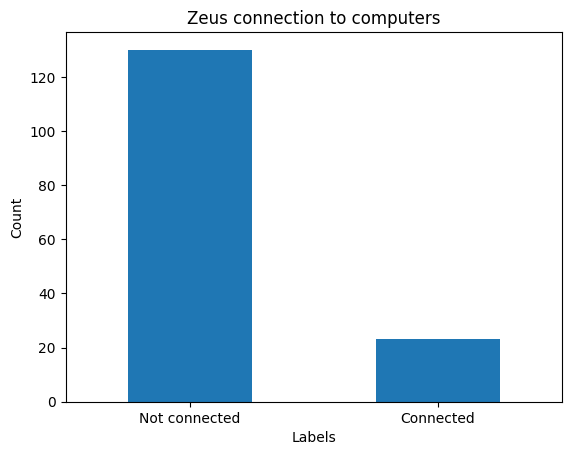

In [151]:
labels = ['Not connected','Connected']
classes = pd.value_counts(data['Zeus'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Zeus connection to computers")
plt.xticks(range(2), labels)
plt.xlabel("Labels")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

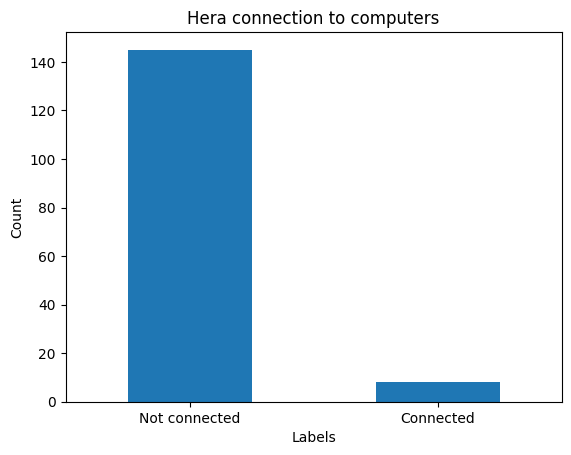

In [152]:
labels = ['Not connected','Connected']
classes = pd.value_counts(data['Hera'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Hera connection to computers")
plt.xticks(range(2), labels)
plt.xlabel("Labels")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

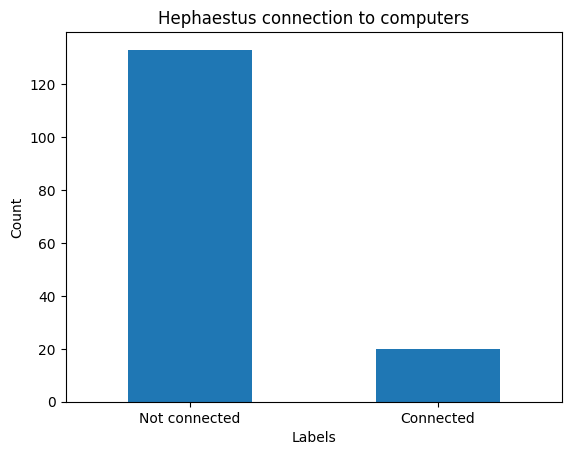

In [153]:
labels = ['Not connected','Connected']
classes = pd.value_counts(data['Hephaestus'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Hephaestus connection to computers")
plt.xticks(range(2), labels)
plt.xlabel("Labels")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

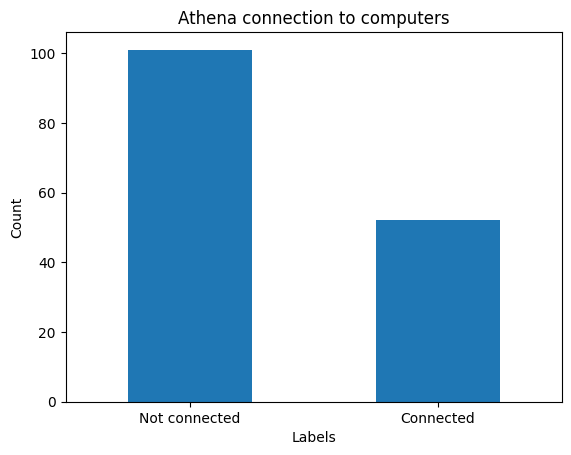

In [154]:
labels = ['Not connected','Connected']
classes = pd.value_counts(data['Athena'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Athena connection to computers")
plt.xticks(range(2), labels)
plt.xlabel("Labels")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

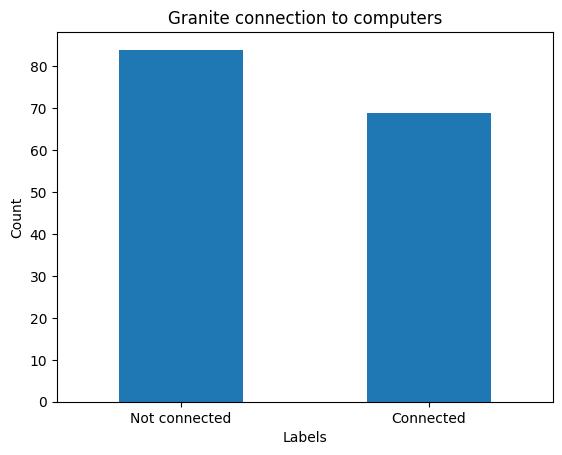

In [155]:
labels = ['Not connected','Connected']
classes = pd.value_counts(data['Granite'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Granite connection to computers")
plt.xticks(range(2), labels)
plt.xlabel("Labels")
plt.ylabel("Count")

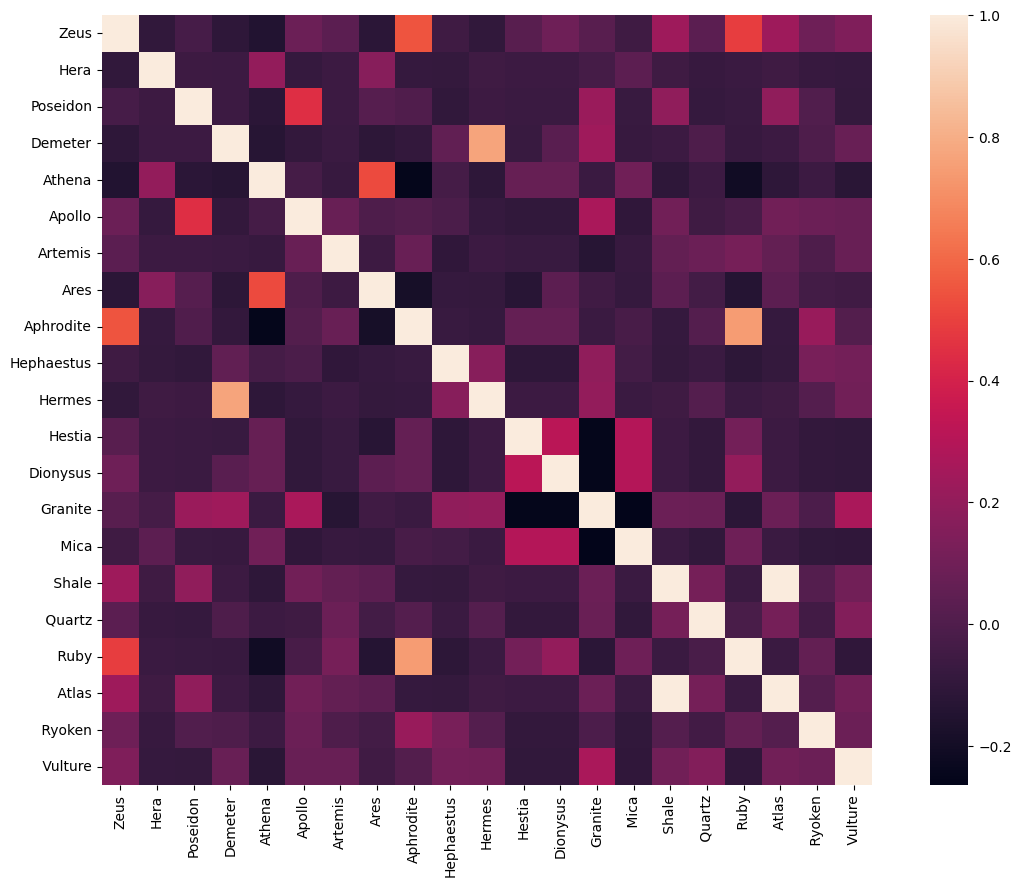

In [156]:
# heat map of correlation of features
#would be good to detail or find out why why computer has really low correlation with some servers(e.g totally black) 
#and some servers are are totally black for others servers, not connected?
#also, maybe after a certain number of connections there is a correlation, like its more red or peach in colour it has many computer number connected in common?
#Will do that later
heapMapCorrFeature = data.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(heapMapCorrFeature, square = True)
plt.show()

<br>

<font size="5"> **Distribution of the variables**</font>

<br>

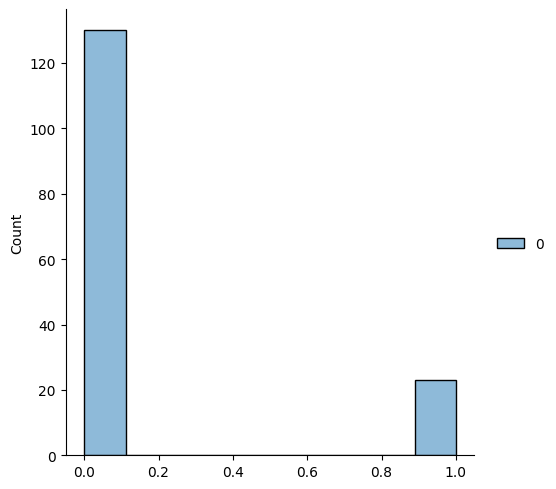

In [157]:
# distribution of Zeus
zeus = [data['Zeus'].values]
sns.displot(zeus)

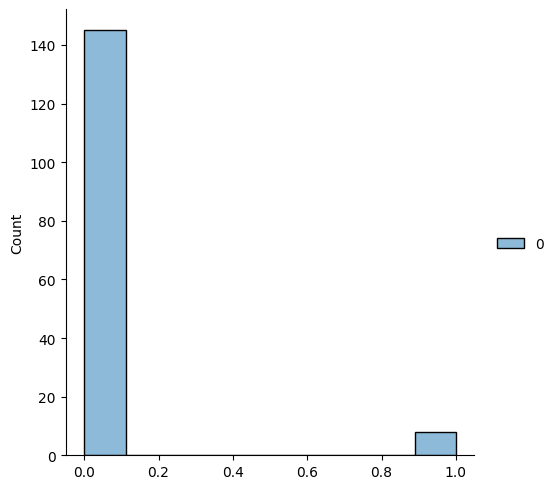

In [158]:
# distribution of Hera
hera = [data['Hera'].values]
sns.displot(hera)

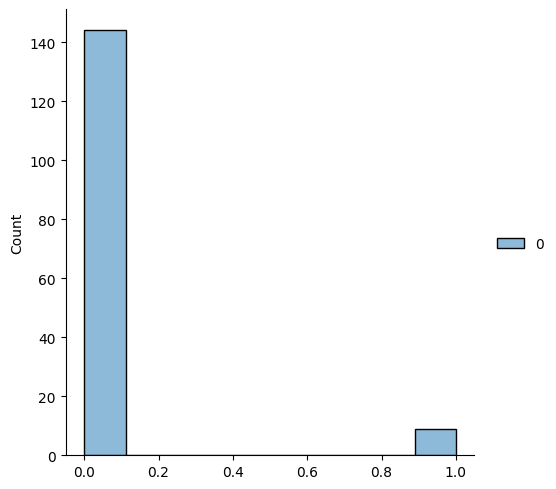

In [159]:
# distribution of Poseidon
poseidon = [data['Poseidon'].values]
sns.displot(poseidon)

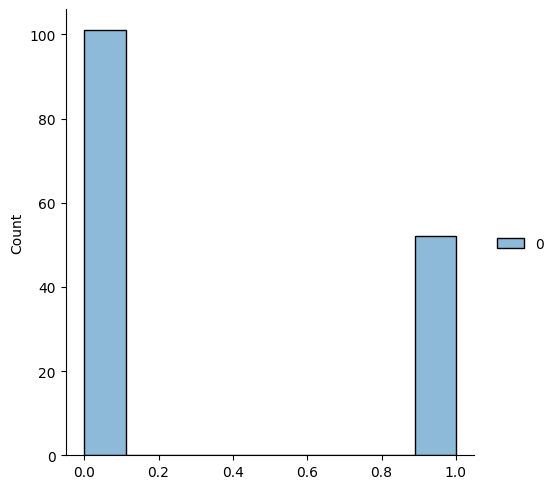

In [160]:
# distribution of Zeus
athena = [data['Athena'].values]
sns.displot(athena)

<br>

<font size="10"> **LINK ANALYSIS SECTION**</font>

<br>

TODO LIST

- feed in as a node attribute
- update the graph based on the 3 things we have (how to input into graph visuals)

In [161]:
#construncting the dataframe
col_name=[]
for column_headers in data.columns[1:22]:
    col_name.append(column_headers)

weighted_adj=[]
for i in col_name:
    row=[]
    for j in col_name:
        
        a=data.loc[:,i][data[i]==1]
        b=data.loc[:,j][data[j]==1]
        array1 = a.index.to_numpy()
        array2 = b.index.to_numpy()
        inter= list(set(array1) & set(array2))
        if i!= j:
            row.append(len(inter))
        else:
            row.append(0)
        
    weighted_adj.append(row)

# print(weighted_adj)
adj=np.array(weighted_adj)
print(adj.shape)
print(adj)
ind = np.unravel_index(np.argmax(adj, axis=None), adj.shape)

#how many computers they share with each other
print(adj[ind])
adj=adj/(adj[ind])



(20, 20)
[[ 0  0  0  6  0  0  5  0  0  0  0  0  3  1  0  0  0  0  0  0]
 [ 0  0  0  1  6  0  3  1  0  0  0  0  8  0  2  0  0  2  1  0]
 [ 0  0  0  1  0  0  1  0  2  7  0  1  9  0  0  1  0  0  1  2]
 [ 6  1  1  0  5  2 33  0  6  1  5  5 21  6  1  4  0  1  4  3]
 [ 0  6  0  5  0  2  5  2  2  0  0  0 14  0  2  1  1  2  3  3]
 [ 0  0  0  2  2  0  2  2  0  0  0  0  2  0  1  2  2  1  1  2]
 [ 5  3  1 33  5  2  0  1  4  1  1  4 19  2  3  4  1  3  4  4]
 [ 0  1  0  0  2  2  1  0  1  0  2  2  6  1  0  2 11  0  5  2]
 [ 0  0  2  6  2  0  4  1  0  3  0  0 14  1  0  1  0  0  4  4]
 [ 0  0  7  1  0  0  1  0  3  0  0  0  7  0  0  1  0  0  1  2]
 [ 0  0  0  5  0  0  1  2  0  0  0  4  0  4  0  0  2  0  0  0]
 [ 0  0  1  5  0  0  4  2  0  0  4  0  0  4  0  0  3  0  0  0]
 [ 3  8  9 21 14  2 19  6 14  7  0  0  0  0  5  9  3  5  7 14]
 [ 1  0  0  6  0  0  2  1  1  0  4  4  0  0  0  0  2  0  0  0]
 [ 0  2  0  1  2  1  3  0  0  0  0  0  5  0  0  2  0  8  1  2]
 [ 0  0  1  4  1  2  4  2  1  1  0  0  9  0  2

In [162]:
#normalised edge list
normalizedAdjMatrix = Normalizer().fit_transform(adj)
#normalizedAdjMatrix

In [163]:
#sum of connection
sum = data.loc[0:153].sum().astype(int)

sum = pd.Series(sum[1:])
sum

Hera           8
Poseidon       9
Demeter       10
Athena        52
Apollo        17
Artemis       10
Ares          46
Aphrodite     17
Hephaestus    20
Hermes         8
Hestia        11
Dionysus      11
Granite       69
 Mica         12
 Shale         8
 Quartz       16
 Ruby         12
 Atlas         8
 Ryoken       16
 Vulture      17
dtype: int64

In [164]:
#binary matrix from the edge matrix above 
edj = np.sign(adj).astype(int)
edj

array([[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
       [0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 1, 1, 1, 0, 0,

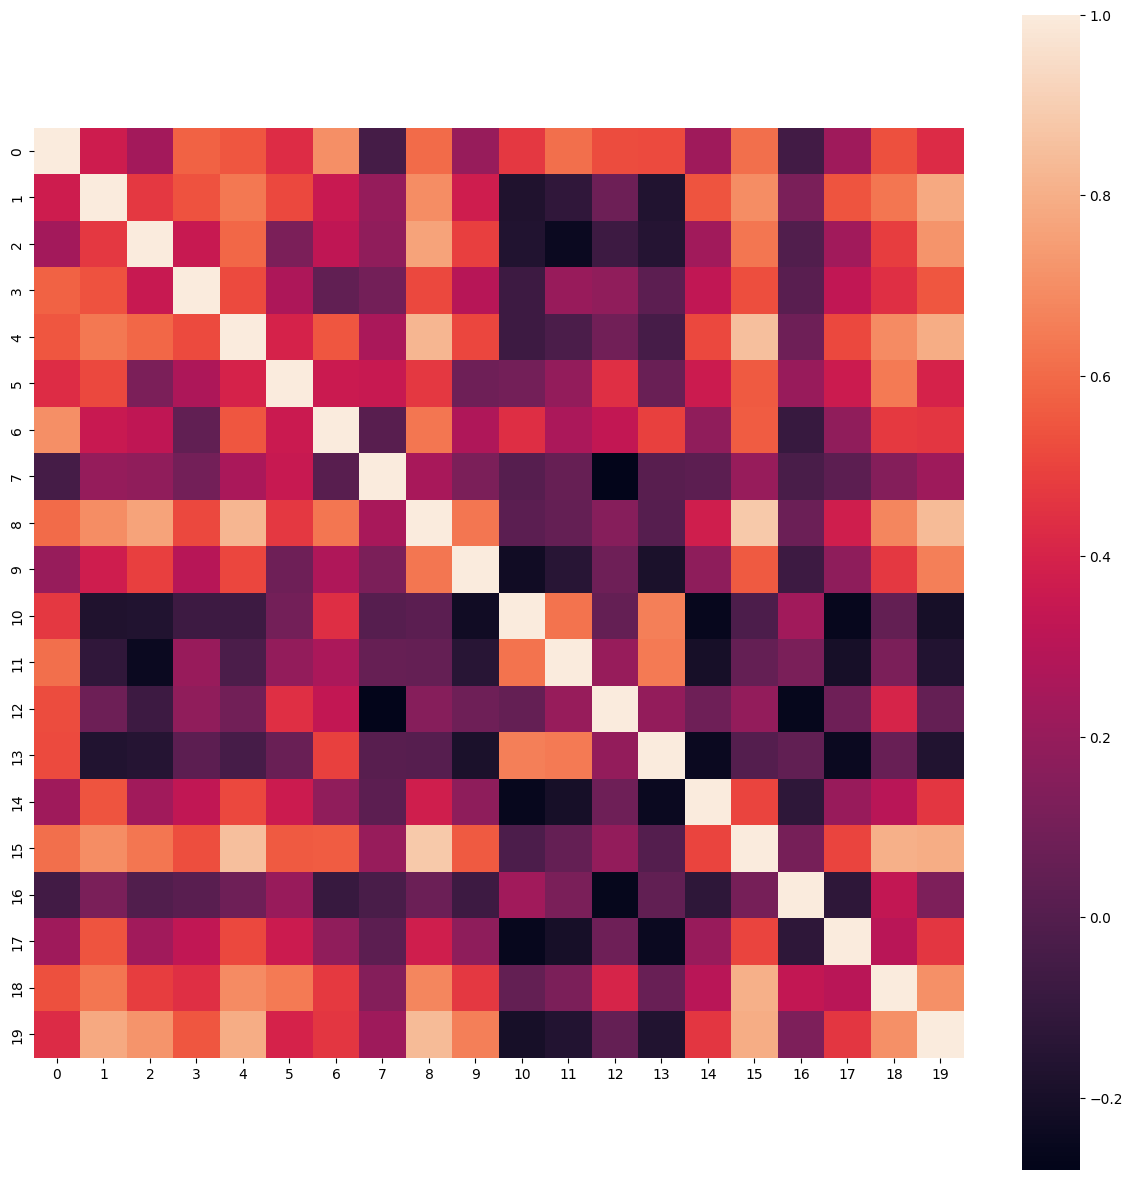

In [165]:
###HEATMAP BASED ON THE CORRELATION BETWEEN THE SERVERS

heapMapCorrFeature = pd.DataFrame(adj).corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(heapMapCorrFeature, square = True)
plt.show()

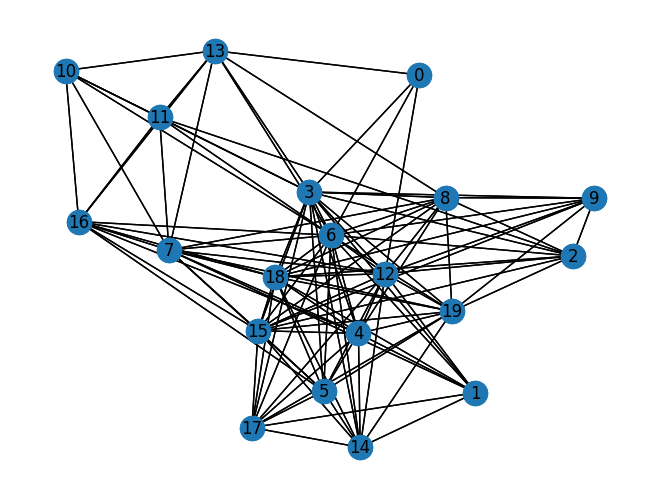

In [166]:
G = nx.from_numpy_matrix(adj, create_using=nx.Graph)
layout = nx.spring_layout(G)
nx.draw(G, layout)
 
nx.draw_networkx(G, pos=layout)
plt.show()

In [167]:
###CENTRALITIES FOR DIRECTED GRAPH
deg_cen = pd.Series(nx.degree_centrality(G))
eigenvectorCen = nx.eigenvector_centrality(G)
closenessCen = nx.closeness_centrality(G)

deg_cen.sort_values(ascending=False)

6     1.000000
3     0.894737
12    0.842105
18    0.789474
15    0.736842
19    0.684211
4     0.684211
7     0.684211
5     0.578947
8     0.578947
16    0.526316
14    0.526316
17    0.526316
2     0.473684
13    0.421053
1     0.421053
9     0.421053
11    0.368421
10    0.315789
0     0.210526
dtype: float64

In [168]:
print(nx.info(G))

Graph with 20 nodes and 111 edges


/var/folders/xh/tqsdsgs13fv7d3kfbhybsyj80000gn/T/ipykernel_19663/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [169]:
G = nx.from_numpy_matrix(adj)

In [170]:
G.add_nodes_from(column_names)

In [171]:
#adding the name of the servers as nodes
G.add_nodes_from(column_names)

#replaced the numbers to the name of the servers
mapping = dict(zip(G, col_name))
print(mapping)

G = nx.relabel_nodes(G, mapping) 

{0: 'Hera', 1: 'Poseidon', 2: 'Demeter', 3: 'Athena', 4: 'Apollo', 5: 'Artemis', 6: 'Ares', 7: 'Aphrodite', 8: 'Hephaestus', 9: 'Hermes', 10: 'Hestia', 11: 'Dionysus', 12: 'Granite', 13: ' Mica', 14: ' Shale', 15: ' Quartz', 16: ' Ruby', 17: ' Atlas', 18: ' Ryoken', 19: ' Vulture'}


In [172]:
print("Nodes of graph: ")
print(G.nodes())

print()
print()
print()

print("Edges of graph: ")
print(G.edges())

Nodes of graph: 
['Hera', 'Poseidon', 'Demeter', 'Athena', 'Apollo', 'Artemis', 'Ares', 'Aphrodite', 'Hephaestus', 'Hermes', 'Hestia', 'Dionysus', 'Granite', ' Mica', ' Shale', ' Quartz', ' Ruby', ' Atlas', ' Ryoken', ' Vulture']



Edges of graph: 
[('Hera', 'Athena'), ('Hera', 'Ares'), ('Hera', 'Granite'), ('Hera', ' Mica'), ('Poseidon', 'Athena'), ('Poseidon', 'Apollo'), ('Poseidon', 'Ares'), ('Poseidon', 'Aphrodite'), ('Poseidon', 'Granite'), ('Poseidon', ' Shale'), ('Poseidon', ' Atlas'), ('Poseidon', ' Ryoken'), ('Demeter', 'Athena'), ('Demeter', 'Ares'), ('Demeter', 'Hephaestus'), ('Demeter', 'Hermes'), ('Demeter', 'Dionysus'), ('Demeter', 'Granite'), ('Demeter', ' Quartz'), ('Demeter', ' Ryoken'), ('Demeter', ' Vulture'), ('Athena', 'Apollo'), ('Athena', 'Artemis'), ('Athena', 'Ares'), ('Athena', 'Hephaestus'), ('Athena', 'Hermes'), ('Athena', 'Hestia'), ('Athena', 'Dionysus'), ('Athena', 'Granite'), ('Athena', ' Mica'), ('Athena', ' Shale'), ('Athena', ' Quartz'), ('Athena', '

(-1.2071711696485268,
 1.1802299282059265,
 -1.0756369787123699,
 1.1407257215852886)

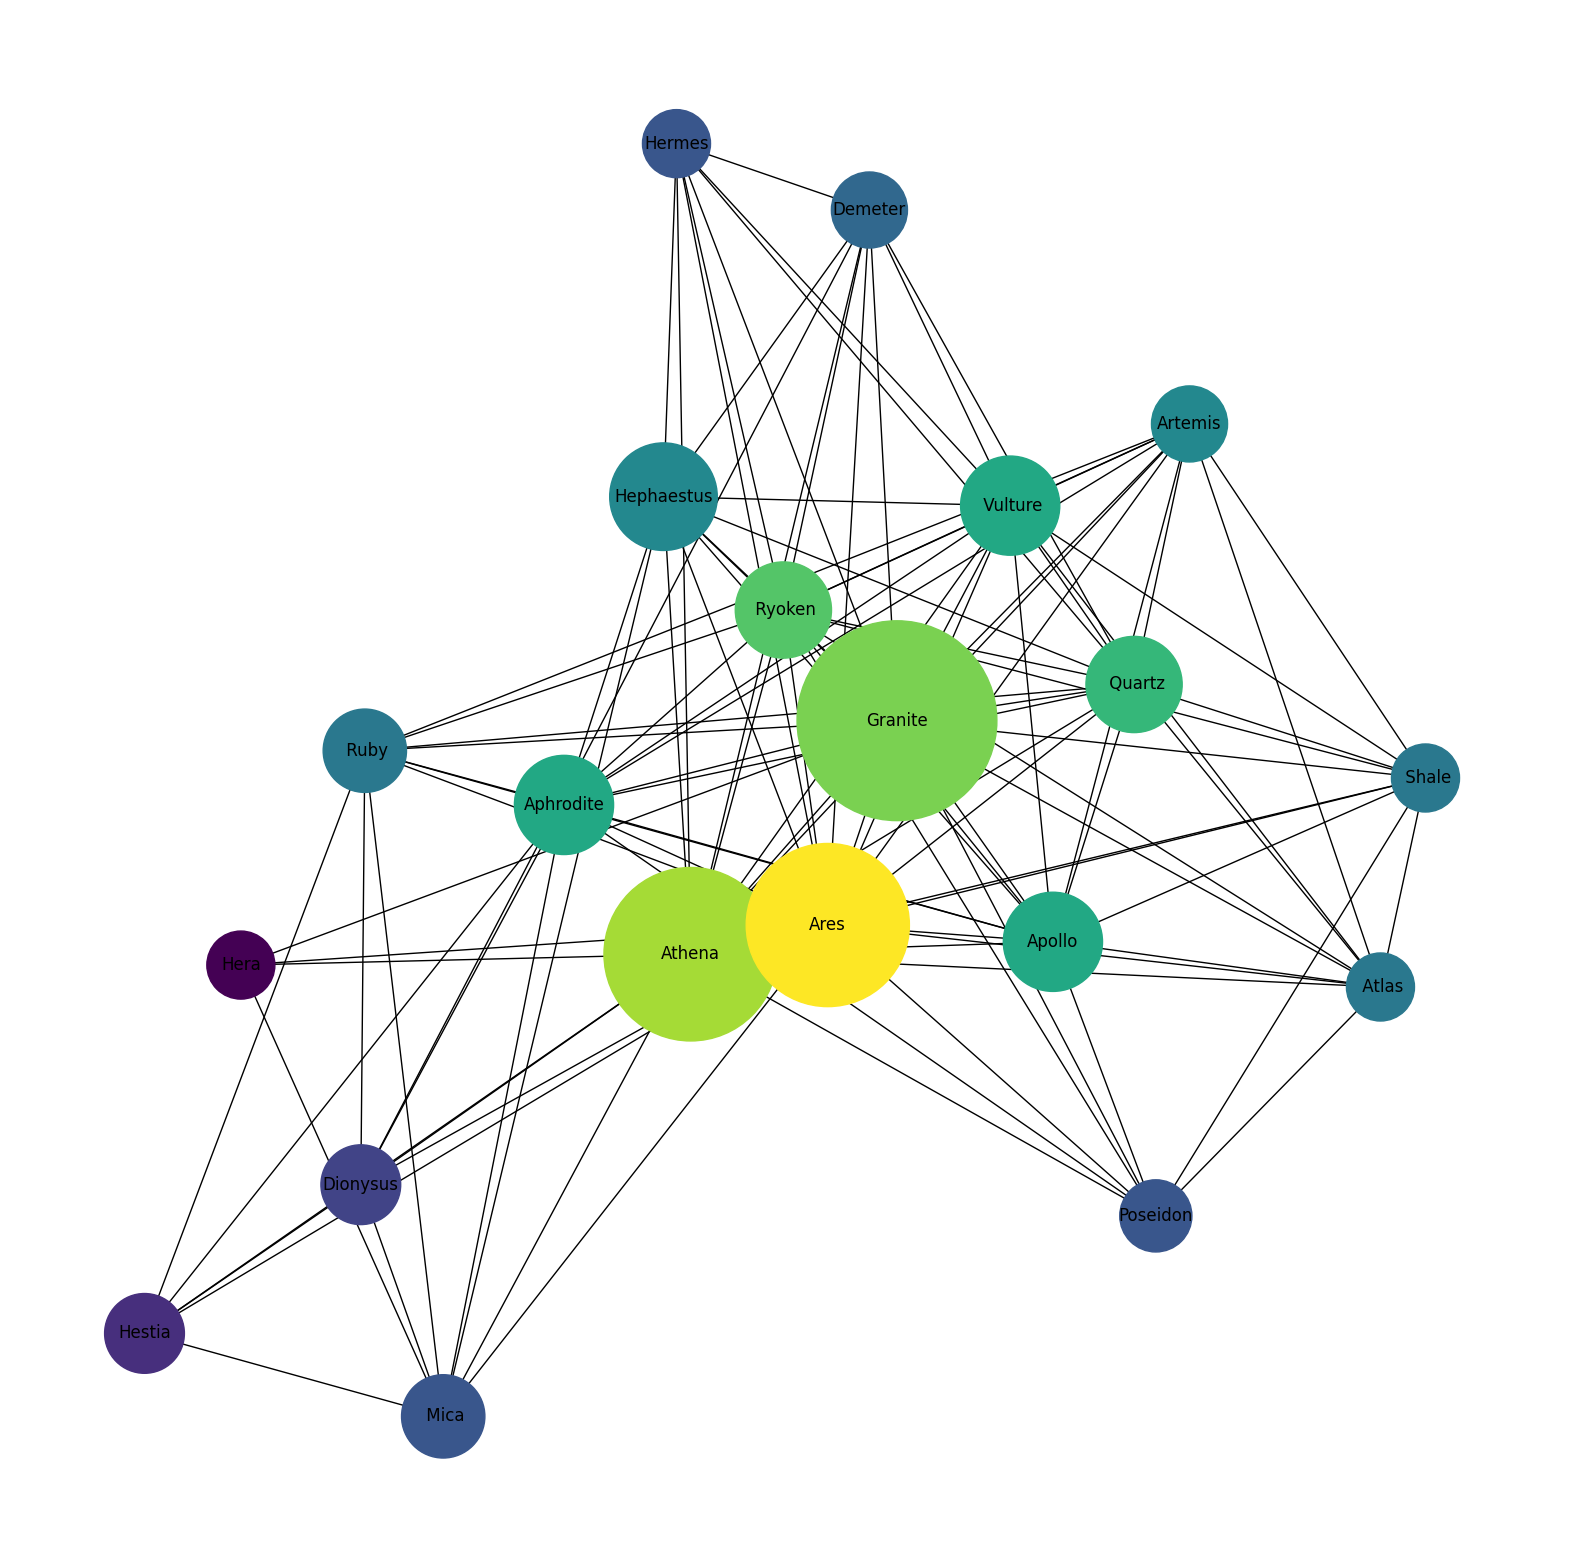

In [173]:
##GRAPH BASED ON CENTRALITY OF THE NODES

pos = nx.spring_layout(G)
betCent = nx.degree_centrality(G)
node_color = [20000.0 * G.degree(v) for v in G]
#node_size =  [v * 10000 for v in betCent.values()]
node_size = (sum * 10) * 10 *3
plt.figure(figsize=(20,20))

#this graph shows that although granite has more connection to computer, ares still has more same 
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [174]:
print(f"Average connectivity is : {math.floor(nx.average_node_connectivity(G))}")

Average connectivity is : 8


In [175]:
a=data.loc[:,' Shale'][data[' Shale']==1]

print(a)
print(len(a))

array1 = a.index.to_numpy()
print(array1)


ComputerNumber
96     1
108    1
114    1
116    1
126    1
127    1
128    1
136    1
Name:  Shale, dtype: int64
8
[ 96 108 114 116 126 127 128 136]


In [176]:
a=data.loc[:,'Granite'][data['Granite']==1]

print(a)
print(len(a))

b=a.to_frame(name='ComputerNumber')
array2 = a.index.to_numpy()
print(array2)


ComputerNumber
3      1
4      1
5      1
6      1
7      1
      ..
146    1
147    1
149    1
151    1
152    1
Name: Granite, Length: 69, dtype: int64
69
[  3   4   5   6   7   8   9  10  12  19  21  22  25  28  30  33  35  36
  41  42  55  64  67  68  73  74  75  77  78  82  84  85  91  92  94  95
 100 101 102 105 108 109 110 112 113 114 117 118 119 120 121 122 126 128
 129 131 136 137 138 140 141 142 143 145 146 147 149 151 152]


In [177]:
array1=set()


plotting another graph

In [178]:
#dataframeData.append({'ComputerNumber': i+1, 'Newtork':'Zeus'}, ignore_index=True)
        #create a dataframe that uses the source(computer number) and target(network)
        #use the network as nodes and the network as edges? or visa versa?
        
#HAVENT ADDED ALL THE NETWORK YET
dataframeData = pd.DataFrame(columns=['ComputerNumber','Network'])  #creating our source and target using the connected netwrks
data = pd.read_csv(path+'/11_Autonomous_Systems.csv')
for i in range(len(data)):
    if data["Zeus"][i] == 1:
        #print(i + 1) #prints the computer number that zeus is connected to
        dataframeData.loc[-1] = [i+1, 'Zeus']
        dataframeData.index = dataframeData.index + 1
        
    if data["Hera"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Hera']
        dataframeData.index = dataframeData.index + 1
        
    if data["Poseidon"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Poseidon']
        dataframeData.index = dataframeData.index + 1
        
        
    if data["Demeter"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Demeter']
        dataframeData.index = dataframeData.index + 1
        
        
    if data["Athena"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Athena']
        dataframeData.index = dataframeData.index + 1
        
        
              
    if data["Apollo"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Apollo']
        dataframeData.index = dataframeData.index + 1
        
              
    if data["Artemis"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Artemis']
        dataframeData.index = dataframeData.index + 1
        
        
              
    if data["Ares"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Ares']
        dataframeData.index = dataframeData.index + 1
        
        
              
    if data["Aphrodite"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Aphrodite']
        dataframeData.index = dataframeData.index + 1
        
        
              
    if data["Hephaestus"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Hephaestus']
        dataframeData.index = dataframeData.index + 1
        
        
              
    if data["Hermes"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Hermes']
        dataframeData.index = dataframeData.index + 1
        
        
        
    if data["Hestia"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Hestia']
        dataframeData.index = dataframeData.index + 1    
        
        
        
    if data["Dionysus"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Dionysus']
        dataframeData.index = dataframeData.index + 1   
        
        
    
    if data["Granite"][i] == 1:
        #print(i + 1)
        dataframeData.loc[-1] = [i+1, 'Granite']
        dataframeData.index = dataframeData.index + 1   
        
        
        
dataframeData

,ComputerNumber,Network
310,1,Athena
309,1,Hestia
308,2,Athena
307,2,Hestia
306,3,Demeter
...,...,...
4,152,Ares
3,152,Hephaestus
2,152,Granite
1,153,Zeus


In [179]:

dataframeData = pd.DataFrame(columns=['ComputerNumber','Network'])  #creating our source and target using the connected netwrks
data = pd.read_csv(path+'/11_Autonomous_Systems.csv')
lst=list_of_column_names
print(lst)
for i in range(len(data)):
    for j in lst:
        if data[j][i] == 1:
            #print(i + 1) #prints the computer number that zeus is connected to
            dataframeData.loc[0] = [i+1, j]
            dataframeData.index = dataframeData.index - 1

dataframeData.index = dataframeData.index + len(dataframeData)
dataframeData

['Zeus', 'Hera', 'Poseidon', 'Demeter', 'Athena', 'Apollo', 'Artemis', 'Ares', 'Aphrodite', 'Hephaestus', 'Hermes', 'Hestia', 'Dionysus', 'Granite', ' Mica', ' Shale', ' Quartz', ' Ruby', ' Atlas', ' Ryoken', ' Vulture']


,ComputerNumber,Network
0,1,Athena
1,1,Hestia
2,2,Athena
3,2,Hestia
4,2,Mica
...,...,...
395,152,Ares
396,152,Hephaestus
397,152,Granite
398,153,Zeus


In [180]:
edges = []
tbG  = []
for index, row in dataframeData.iterrows():
    edges.insert( index, row)
    tbG.append(row.tolist())
    #print(index)
    

In [181]:
tbG

[[1, 'Athena'],
 [1, 'Hestia'],
 [2, 'Athena'],
 [2, 'Hestia'],
 [2, ' Mica'],
 [3, 'Demeter'],
 [3, 'Hermes'],
 [3, 'Granite'],
 [4, 'Demeter'],
 [4, 'Hephaestus'],
 [4, 'Hermes'],
 [4, 'Granite'],
 [4, ' Ryoken'],
 [4, ' Vulture'],
 [5, 'Athena'],
 [5, 'Hephaestus'],
 [5, 'Granite'],
 [5, ' Vulture'],
 [6, 'Demeter'],
 [6, 'Hermes'],
 [6, 'Granite'],
 [6, ' Vulture'],
 [7, 'Demeter'],
 [7, 'Hermes'],
 [7, 'Granite'],
 [8, 'Demeter'],
 [8, 'Hermes'],
 [8, 'Granite'],
 [8, ' Quartz'],
 [9, 'Demeter'],
 [9, 'Hermes'],
 [9, 'Granite'],
 [10, 'Demeter'],
 [10, 'Granite'],
 [11, 'Athena'],
 [11, ' Quartz'],
 [12, 'Demeter'],
 [12, 'Athena'],
 [12, 'Ares'],
 [12, 'Hephaestus'],
 [12, 'Hermes'],
 [12, 'Granite'],
 [13, 'Athena'],
 [13, 'Ares'],
 [13, 'Dionysus'],
 [14, 'Athena'],
 [15, 'Athena'],
 [15, 'Ares'],
 [16, 'Zeus'],
 [16, 'Aphrodite'],
 [16, ' Ruby'],
 [16, ' Ryoken'],
 [17, 'Athena'],
 [17, ' Mica'],
 [18, 'Zeus'],
 [18, 'Aphrodite'],
 [18, ' Ryoken'],
 [18, ' Vulture'],
 [19, 'Ze

In [182]:
G2 = nx.Graph()

In [189]:
G2.add_edges_from(tbG)
G2.add_nodes_from(list_of_column_names)
comp=range(1,154)
G2.add_nodes_from(comp)
print(nx.info(G2))

Graph with 174 nodes and 400 edges


/var/folders/xh/tqsdsgs13fv7d3kfbhybsyj80000gn/T/ipykernel_19663/3957041523.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G2))


In [206]:
print("Nodes of graph: ")
print(G2.nodes())

print()
print()
print()

print("Edges of graph: ")
print(G2.edges())

Nodes of graph: 
[1, 'Athena', 'Hestia', 2, ' Mica', 3, 'Demeter', 'Hermes', 'Granite', 4, 'Hephaestus', ' Ryoken', ' Vulture', 5, 6, 7, 8, ' Quartz', 9, 10, 11, 12, 'Ares', 13, 'Dionysus', 14, 15, 16, 'Zeus', 'Aphrodite', ' Ruby', 17, 18, 19, 20, 'Artemis', 21, 22, 23, 24, 25, 'Poseidon', 26, 27, 28, 29, 30, 'Apollo', 31, 32, 33, 35, 'Hera', 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, ' Shale', ' Atlas', 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 149, 151, 152, 153, 34, 48, 49, 51, 72, 81, 99, 111, 115, 134, 135, 144, 148, 150]



Edges of graph: 
[(1, 'Athena'), (1, 'Hestia'), ('Athena', 2), ('Athena', 5), ('Athena', 11), ('Athena

(-1.102514482605941, 1.1528041347247593, -1.1779168247470078, 1.16304686598161)

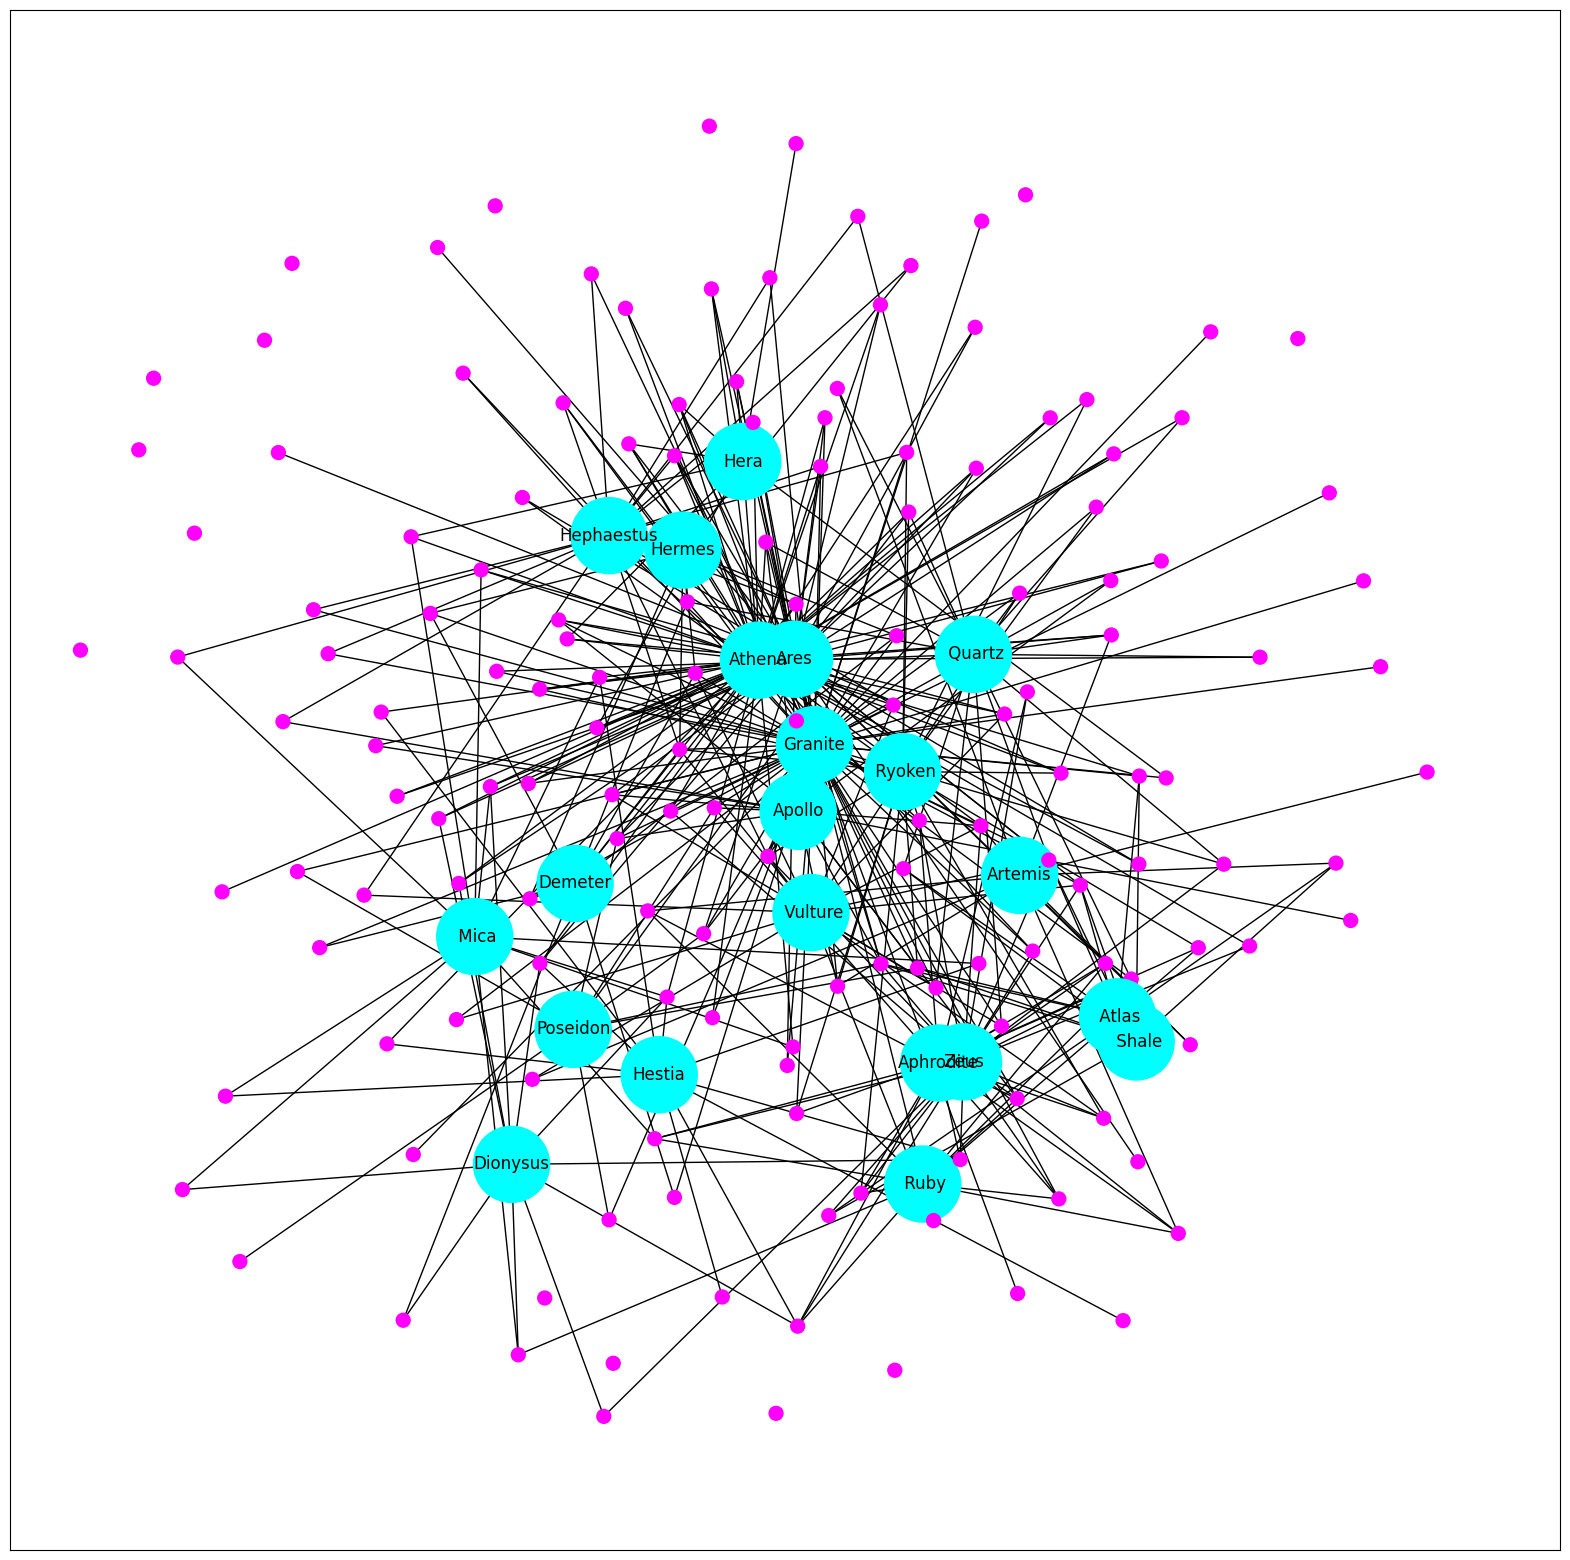

In [220]:
pos = nx.spring_layout(G2,k=0.5)
betCent = nx.degree_centrality(G2)
node_color =[]
node_size = []
labels={}
for node in G2:
    if type(node) == str:
        node_color.append('cyan')
        node_size.append(3000)
        labels[node]=node
    else: 
        node_color.append('magenta')  
        node_size.append(100)  

# node_size =  [100*G2.degree(v)for v in G2]
plt.figure(figsize=(20,20))
# nx.draw_networkx(G2, pos=pos, with_labels=True,
#                  node_color=node_color,
#                  node_size=node_size )
nx.draw_networkx(G2, pos=pos, labels=labels,node_size=node_size,node_color=node_color)
plt.axis('on')

<br>

<font size="5"> **Page Rank**</font>

<br>

In [186]:
#PAGE RANK
pr = nx.pagerank(G, alpha = 0.8)
print("PAGE RANK")
pr

PAGE RANK


{'Hera': 0.022706202738489598,
 'Poseidon': 0.03130361342236922,
 'Demeter': 0.03319207772309109,
 'Athena': 0.10870177379932194,
 'Apollo': 0.05381633622315425,
 'Artemis': 0.027756827860204156,
 'Ares': 0.10252238913054128,
 'Aphrodite': 0.0486042501191203,
 'Hephaestus': 0.047307479082748446,
 'Hermes': 0.031150243654165456,
 'Hestia': 0.028798917810439573,
 'Dionysus': 0.0338491463555,
 'Granite': 0.14747647024657246,
 ' Mica': 0.03180889304332904,
 ' Shale': 0.03544985895678238,
 ' Quartz': 0.042059924633967044,
 ' Ruby': 0.039099807310251866,
 ' Atlas': 0.03544985895678238,
 ' Ryoken': 0.04601840232135439,
 ' Vulture': 0.052927526611815684}

In [187]:
##identify the relevant and popular links in a graph - part of link analysis

hubs, autority = nx.hits(G)

#links received
print("Hubs")
print(sorted(hubs.items(), key=lambda x: x[1], reverse=True))
print("\n\n")

#popularity of the links
print("Authority")
print(sorted(autority.items(), key=lambda x: x[1], reverse=True))

Hubs
[('Granite', 0.1476528059241153), ('Athena', 0.13737616368619376), ('Ares', 0.13418964239240214), ('Apollo', 0.06325687674260587), ('Hephaestus', 0.06144465623209367), (' Vulture', 0.05976594308346513), (' Ryoken', 0.04566480359508369), (' Quartz', 0.045399545922633976), ('Poseidon', 0.03337291062934577), ('Demeter', 0.03134296259595162), ('Aphrodite', 0.02944491758248188), (' Shale', 0.028812435925423152), (' Atlas', 0.028812435925423152), ('Hera', 0.028529571988586837), ('Hermes', 0.027959961434073442), ('Dionysus', 0.022064901752782674), (' Mica', 0.020406849168338317), ('Artemis', 0.020025258177275945), (' Ruby', 0.018641638950666818), ('Hestia', 0.015835718291056823)]



Authority
[('Granite', 0.14765280592411537), ('Athena', 0.13737616368619374), ('Ares', 0.13418964239240225), ('Apollo', 0.06325687674260586), ('Hephaestus', 0.06144465623209369), (' Vulture', 0.059765943083465146), (' Ryoken', 0.04566480359508371), (' Quartz', 0.045399545922633996), ('Poseidon', 0.03337291062

/Users/fmd/Library/Python/3.8/lib/python/site-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


In [188]:
#neighbours of the most popular server based on hubs, authority and page ranking
list(G.neighbors(13))

NetworkXError: The node 13 is not in the graph.